In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


SyntaxError: invalid syntax (1080490803.py, line 5)

# Naissances par département

Fichiers naissance par département
Source https://www.insee.fr/fr/statistiques/2540004?sommaire=4767262 
Puis Fichiers par départements de naissance, csv 12 mo

In [2]:
names = pd.read_csv("https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2020_csv.zip", compression = "zip", sep = ";")

In [3]:
names.head()
names.tail()
names.sample(n = 10)

,sexe,preusuel,annais,dpt,nombre
1316492,1,PATRICE,1972,75,117
1026542,1,LOUIS,1928,81,79
3348307,2,OCÉANE,2018,41,5
2297374,2,ELEA,2004,21,3
747754,1,JACKIE,1933,89,7
868206,1,JOAO,1972,88,4
949189,1,KEVIN,1979,72,11
3045066,2,MARIANNE,1900,59,5
1972643,2,AUDREY,1982,43,13
308942,1,CHRISTOPHE,1996,26,9


In [4]:
names["dpt"].unique()
# Les 970 je suppose que ce sont les départements d'outre-mer ?
# On a quelques XX
names.columns

Index(['sexe', 'preusuel', 'annais', 'dpt', 'nombre'], dtype='object')

In [5]:
names = names.drop(names[names.dpt == 'XX'].index)
birthcount = pd.DataFrame(names.groupby(["annais", "dpt"]).nombre.sum())

In [6]:
birthcount = birthcount.reset_index()

In [7]:
birth_year = birthcount.groupby("annais").sum().reset_index()
birth_year

,annais,nombre
0,1900,393440
1,1901,431752
2,1902,443906
3,1903,446652
4,1904,456938
...,...,...
116,2016,584848
117,2017,571275
118,2018,561993
119,2019,556714


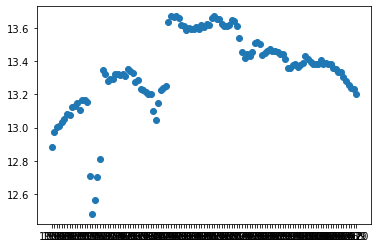

In [8]:
plt.scatter(birth_year.annais, np.log(birth_year.nombre))

# Délits

Crimes et délits enregistrés
Source : https://www.data.gouv.fr/fr/datasets/crimes-et-delits-enregistres-par-les-services-de-gendarmerie-et-de-police-depuis-2012/
Puis fichier xlsx (3.9 mo)

Noter que les infrastractions dans la BD correspondent à l'année et au lieu d'enregistrement, et pas forcément à l'année et au lieu où elles ont été commises
Il y a aussi eu des ruptures dans l'enregistrement des données 

!pip install openpyxl necessaire - sur mon PC en tout cas - pour pouvoir ouvrir le fichier xlsx
Le fichier comprend de nombreuses feuilles différentes : "Services PN 2012" & "Services GN 2012", 2012 pouvant être remplacé 
par les années de 2012 à 2020

In [9]:
delits = pd.read_excel("https://www.data.gouv.fr/fr/datasets/r/d792092f-b1f7-4180-a367-d043200c1520", 
                      sheet_name = "Services PN 2012",
                      usecols = "B:ADW",
                      skiprows = [1,2])

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
delits.head()
delits.sample(n=10)
delits.tail()

Il faudrait réunnir les délits par départements, vu qu'ils sont actuellement réunis selon une autre classification

Vu l'état des données, **elles me semblent difficilement utilisables**

# Musées

Liste et localisation des musées en France
https://www.data.gouv.fr/fr/datasets/liste-et-localisation-des-musees-de-france/
Puis liste des musées de france au 31/12/2017 (238.3ko)

In [13]:
musees = pd.read_excel("https://www.data.gouv.fr/fr/datasets/r/22df4a13-72d8-4b34-940e-8aec297b5ded",
                      usecols = "A,B,E:I")

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [12]:
musees.head()

NameError: name 'musees' is not defined

In [ ]:
musees.groupby("NOMDEP").size()
# Permet d'avoir le nombre de musées par département, bien qu'il soit sous forme de nom et pas de numéro

# Chômage 

In [85]:
# importation des données 

import zipfile
from urllib.request import urlopen
import shutil
import os

url = "https://www.insee.fr/fr/statistiques/series/csv/famille/102760732"
file_name = 'famille_TAUX-CHOMAGE_23122021.zip'

# extracting zipfile from URL
with urlopen(url) as response, open(file_name, 'wb') as out_file:
   shutil.copyfileobj(response, out_file)

# extracting required file from zipfile
with zipfile.ZipFile(file_name) as zf:
   zf.extract('valeurs_trimestrielles.csv')

# deleting the zipfile from the directory
os.remove('famille_TAUX-CHOMAGE_23122021.zip')

# loading data from the file
chomage = pd.read_csv('valeurs_trimestrielles.csv', sep=";")
chomage.head()
#display("Libellés d'origine")
#display(chomage["Libellé"].unique())

# on fait un peu de nettoyage
chomage_vf = chomage.drop(chomage[chomage["Libellé"] == "Codes"].index)
chomage_vf = chomage_vf.reset_index()
chomage_vf.shape

chomage_vf["Libellé"] = [nom.split(" ")[7] for nom in chomage_vf["Libellé"]]
chomage_vf = chomage_vf.drop(columns = ["index", "idBank", "Dernière mise à jour", "Période"])
#display("Libellés modifiés")
#display(chomage_vf["Libellé"].unique())
#display("Attention, maintenant on a plus dans le nom l'indication que c'est un département ou une région !")

In [86]:
#display(chomage_vf.head())

# On ne garde que les valeurs depuis 2016
liste_cols = ["Libellé"]
annees = ["20"+str(i) for i in range(16,21)]
trimestres = ["-T"+str(i) for i in range(1,5)]

for an in annees:
    for tr in trimestres:
        liste_cols.append(an+tr)
liste_cols.append("2021-T1")
liste_cols.append("2021-T2")
#print(liste_cols)

chomage_vf = chomage_vf.filter(liste_cols, axis=1)
#display(chomage_vf)

chomage_vf = chomage_vf.replace(to_replace = 'La', value = 'La Réunion', regex=True)
chomage_vf = chomage_vf.replace(to_replace = 'Territoire', value = 'Territoire de Belfort', regex=True)
chomage_vf.isna().sum().any() # Pas de NA dans le df a priori

False

In [87]:
# je ne comprends pas pourquoi ça ne fonctionne pas ==> ça met des NaN 
liste_cols = liste_cols[1:]
print(liste_cols)

# Les valeurs étaient des objets, on les transforme en entiers
chomage_vf = chomage_vf.apply(lambda x: x.astype(float) if x.name in liste_cols else x)

for an in annees:
    chomage_vf[an] = chomage_vf[[an+str(tr) for tr in trimestres]].mean(axis = 1)

chomage_vf['2021'] = chomage_vf[["2021-T1","2021-T2"]].mean(axis=1)
display(chomage_vf)

['2016-T1', '2016-T2', '2016-T3', '2016-T4', '2017-T1', '2017-T2', '2017-T3', '2017-T4', '2018-T1', '2018-T2', '2018-T3', '2018-T4', '2019-T1', '2019-T2', '2019-T3', '2019-T4', '2020-T1', '2020-T2', '2020-T3', '2020-T4', '2021-T1', '2021-T2']


,Libellé,2016-T1,2016-T2,2016-T3,2016-T4,2017-T1,2017-T2,2017-T3,2017-T4,2018-T1,...,2020-T3,2020-T4,2021-T1,2021-T2,2016,2017,2018,2019,2020,2021
0,France,9.9,9.8,9.6,9.7,9.3,9.2,9.3,8.7,8.9,...,8.9,7.8,7.8,7.8,9.750,9.125,8.700,8.175,7.850,7.80
1,Île-de-France,8.8,8.7,8.6,8.8,8.3,8.2,8.3,7.9,8.1,...,8.4,7.7,7.7,7.6,8.725,8.175,7.925,7.400,7.350,7.65
2,Centre-Val,9.7,9.5,9.4,9.4,9.0,9.0,8.9,8.4,8.6,...,8.3,7.1,7.2,7.2,9.500,8.825,8.450,8.050,7.400,7.20
3,Pays,8.8,8.5,8.4,8.4,8.0,7.9,7.9,7.3,7.6,...,8.0,6.7,6.8,6.7,8.525,7.775,7.375,7.050,7.000,6.75
4,Bretagne,8.8,8.6,8.4,8.6,8.1,8.0,8.0,7.5,7.7,...,7.7,6.6,6.6,6.5,8.600,7.900,7.500,6.975,6.775,6.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Var,11.1,10.8,10.7,11.0,10.6,10.4,10.4,9.9,10.2,...,9.7,8.2,8.4,8.6,10.900,10.325,9.925,9.200,8.575,8.50
110,Guadeloupe,25.6,25.1,21.5,20.6,21.6,22.9,21.4,22.5,23.5,...,18.9,19.4,17.5,19.2,23.200,22.100,22.025,20.125,16.850,18.35
111,Martinique,19.8,19.7,19.1,17.4,19.4,19.2,18.3,17.3,16.5,...,16.4,15.0,12.7,14.7,19.000,18.550,18.475,16.150,13.050,13.70
112,Guyane,19.4,19.8,22.8,19.1,18.7,20.4,20.5,18.1,15.8,...,17.1,17.8,12.5,13.8,20.275,19.425,16.825,17.125,14.125,13.15


In [89]:
DEPARTMENTS = {
    '01': 'Ain', 
    '02': 'Aisne', 
    '03': 'Allier', 
    '04': 'Alpes-de-Haute-Provence', 
    '05': 'Hautes-Alpes',
    '06': 'Alpes-Maritimes', 
    '07': 'Ardèche', 
    '08': 'Ardennes', 
    '09': 'Ariège', 
    '10': 'Aube', 
    '11': 'Aude',
    '12': 'Aveyron', 
    '13': 'Bouches-du-Rhône', 
    '14': 'Calvados', 
    '15': 'Cantal', 
    '16': 'Charente',
    '17': 'Charente-Maritime', 
    '18': 'Cher', 
    '19': 'Corrèze', 
    '2A': 'Corse-du-Sud', 
    '2B': 'Haute-Corse',
    '21': 'Côte-d\'Or', 
    '22': 'Côtes-d\'Armor', 
    '23': 'Creuse', 
    '24': 'Dordogne', 
    '25': 'Doubs', 
    '26': 'Drôme',
    '27': 'Eure', 
    '28': 'Eure-et-Loir', 
    '29': 'Finistère', 
    '30': 'Gard', 
    '31': 'Haute-Garonne', 
    '32': 'Gers',
    '33': 'Gironde', 
    '34': 'Hérault', 
    '35': 'Ille-et-Vilaine', 
    '36': 'Indre', 
    '37': 'Indre-et-Loire',
    '38': 'Isère', 
    '39': 'Jura', 
    '40': 'Landes', 
    '41': 'Loir-et-Cher', 
    '42': 'Loire', 
    '43': 'Haute-Loire',
    '44': 'Loire-Atlantique', 
    '45': 'Loiret', 
    '46': 'Lot', 
    '47': 'Lot-et-Garonne', 
    '48': 'Lozère',
    '49': 'Maine-et-Loire', 
    '50': 'Manche', 
    '51': 'Marne', 
    '52': 'Haute-Marne', 
    '53': 'Mayenne',
    '54': 'Meurthe-et-Moselle', 
    '55': 'Meuse', 
    '56': 'Morbihan', 
    '57': 'Moselle', 
    '58': 'Nièvre', 
    '59': 'Nord',
    '60': 'Oise', 
    '61': 'Orne', 
    '62': 'Pas-de-Calais', 
    '63': 'Puy-de-Dôme', 
    '64': 'Pyrénées-Atlantiques',
    '65': 'Hautes-Pyrénées', 
    '66': 'Pyrénées-Orientales', 
    '67': 'Bas-Rhin', 
    '68': 'Haut-Rhin', 
    '69': 'Rhône',
    '70': 'Haute-Saône', 
    '71': 'Saône-et-Loire', 
    '72': 'Sarthe', 
    '73': 'Savoie', 
    '74': 'Haute-Savoie',
    '75': 'Paris', 
    '76': 'Seine-Maritime', 
    '77': 'Seine-et-Marne', 
    '78': 'Yvelines', 
    '79': 'Deux-Sèvres',
    '80': 'Somme', 
    '81': 'Tarn', 
    '82': 'Tarn-et-Garonne', 
    '83': 'Var', 
    '84': 'Vaucluse', 
    '85': 'Vendée',
    '86': 'Vienne', 
    '87': 'Haute-Vienne', 
    '88': 'Vosges', 
    '89': 'Yonne', 
    '90': 'Territoire de Belfort',
    '91': 'Essonne', 
    '92': 'Hauts-de-Seine', 
    '93': 'Seine-Saint-Denis', 
    '94': 'Val-de-Marne', 
    '95': 'Val-d\'Oise',
    '971': 'Guadeloupe', 
    '972': 'Martinique', 
    '973': 'Guyane', 
    '974': 'La Réunion', 
    '976': 'Mayotte',
}
flipped_dict = dict(zip(DEPARTMENTS.values(), DEPARTMENTS.keys()))
chomage_vf["Département"]=chomage_vf["Libellé"].map(flipped_dict)
chomage_vf.drop( chomage_vf[chomage_vf['Département'].isnull()].index, inplace=True)
chomage_final=chomage_vf[["Département","Libellé","2016","2017","2018","2019","2020","2021"]].copy()
chomage_final.columns=["Département","Libellé","chomage_2016","chomage_2017","chomage_2018","chomage_2019","chomage_2020","chomage_2021"]
chomage_final.sort_values(by='Département')
chomage_final

,Département,Libellé,chomage_2016,chomage_2017,chomage_2018,chomage_2019,chomage_2020,chomage_2021
14,12,Aveyron,7.300,6.900,6.575,6.275,6.025,6.00
15,01,Ain,7.350,6.775,6.325,6.050,6.075,6.05
16,02,Aisne,13.800,13.175,12.575,11.775,11.125,11.15
17,03,Allier,10.525,9.900,9.525,9.050,8.650,8.45
18,04,Alpes-de-Haute-Provence,11.450,11.075,10.750,10.075,9.400,9.35
...,...,...,...,...,...,...,...,...
109,83,Var,10.900,10.325,9.925,9.200,8.575,8.50
110,971,Guadeloupe,23.200,22.100,22.025,20.125,16.850,18.35
111,972,Martinique,19.000,18.550,18.475,16.150,13.050,13.70
112,973,Guyane,20.275,19.425,16.825,17.125,14.125,13.15


# Taux de logements vacants 

en théorie, plus le taux de logements vacants est élevé dans une zone, plus les prix sont bas 

-Nombre de logements du parc privé
-Nombre de logements vacants du parc privé au 01/01/2019
-Nombre de logements du parc privé vacants depuis moins de deux ans au 01/01/2019
-Nombre de logements du parc privé vacants depuis deux ans ou plus au 01/01/2019
-Taux de logements vacants du parc privé au 01/01/2019
-Taux de logements du parc privé vacants depuis moins de deux ans au 01/01/2019
-Taux de logements du parc privé vacants depuis deux ans ou plus au 01/01/2019

In [104]:
link = 'https://www.data.gouv.fr/fr/datasets/r/d6b298be-42ee-4a9f-9a01-c8cb6edd4978'
vacants = pd.read_excel(link, 'Données')

In [105]:
vacants.head()

,INSEE_COM,NOM_COM,Nb_log_pp_2020,Nb_logvac_pp_010119,Nb_logvac_pp_C_010119,Nb_logvac_2A_010119,Prop_logvac_pp_010119,Prop_logvac_pp_C_010119,Prop_logvac_pp_2A_010119,CODE_EPCI,NOM_EPCI,CODE_DEPT,NOM_DEPT,NOM_REGION
0,01004,Ambérieu-en-Bugey,5776,565,402,163,9.781856,6.959834,2.822022,240100883,CC de la Plaine de l'Ain,01,Ain,Auvergne-Rhône-Alpes
1,01007,Ambronay,1222,78,43,35,6.382979,3.518822,2.864157,240100883,CC de la Plaine de l'Ain,01,Ain,Auvergne-Rhône-Alpes
2,01010,Anglefort,583,64,35,29,10.977702,6.003431,4.974271,200070852,CC Usses et Rhône,01,Ain,Auvergne-Rhône-Alpes
3,01014,Arbent,1129,86,45,41,7.617360,3.985828,3.631532,200042935,CA Haut - Bugey Agglomération,01,Ain,Auvergne-Rhône-Alpes
4,01015,Arboys en Bugey,408,33,18,15,8.088235,4.411765,3.676471,200040350,CC Bugey Sud,01,Ain,Auvergne-Rhône-Alpes


3 facteurs qui influencent les prix de l'immobilier : http://www.bsi-economics.org/61-dynamique-des-prix-de-l%EF%BF%BDimmobilier-quels-determinants

- l'environnement économique et financier (offre et demande de logement, contexte économie, structure des marchés immobiliers, logements neufs et anciens, démographie, taux de logements vacants)

- les conditions d'emprunts (taux variables/fixes, maturités des prêts, ratio emprunt sur valeur, répartition des crédits, solvabilité, système de garantie)

- l'environnement fiscal (mesures fiscales incitatives à la location, distorsion fiscale des locataires vers les propriétaires)
